In [1]:

# %%
import random
from citipy import citipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import requests
from config import weather_api_key
from datetime import datetime
import time

# %%
# generate 1500 random latitude and longitude data as a list of tuples
lats = np.random.uniform(-90.0,90.0,size=1500)
lngs = np.random.uniform(-180.0,180.0,size=1500)

lats_lngs = zip(lats, lngs)
coordinates = list(lats_lngs)
print(coordinates[:11])

# %%
# use citipy module to get nearest city names
cities = list()
for coor in coordinates:
    cities_name = citipy.nearest_city(coor[0], coor[1]).city_name
    # ensure no any duplicate cities
    if cities_name not in cities:
        cities.append(cities_name)
print(cities[:10], 'Generate', len(cities))

# %%
# use OpenWeather API to request, get, parse JSON to retrieve weather data for each city.

# initial counters for log and sets
record_count = 1 
set_count = 1

city_data = list()
basic_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

print('Beginning Data Retrieval     ')
print("-----------------------------")

# use enumerate() method to loop index and item simutanously 
for i, item in enumerate(cities):
    if i % 50 == 0 and i != 0 :
        record_count = 1 
        set_count +=1
    # build URL for API call
    url = basic_url + '&q=' + item
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {item}')
    # increment record count
    record_count +=1

    try: 
        js = requests.get(url).json()
        city_name = item
        city_country = js['sys']['country']
        city_UTCdate = js['dt']
        city_date = datetime.utcfromtimestamp(city_UTCdate).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = js['coord']['lat']
        city_lon = js['coord']['lon']
        city_max_temp = js['main']['temp_max']
        city_humidity = js['main']['humidity']
        city_cload = js['clouds']['all']
        city_wind_speed = js['wind']['speed']
        # append as a list of dictionaries
        city_data.append({'City':city_name, 'Coounty':city_country, 'Date':city_date, 
                        'Lat':city_lat, 'Lng': city_lon,'Max Temp':city_max_temp,
                        'Humidity':city_humidity,'Cloudiness': city_cload,'Wind Speed':city_wind_speed})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

print(len(city_data))

[(33.46142431488637, -53.01438161396601), (11.214608033849217, 5.259610872360042), (73.12482931120101, 34.04144873619552), (-16.179900260653824, -100.92423544949392), (6.651315027406625, -46.473136710764294), (-26.414201341931708, -107.29316829008405), (54.24717024040757, 111.06011966078557), (-36.35257523424615, 91.1793519131802), (73.12943370799545, -124.6080773641595), (-18.826843852332885, -74.39378070656623), (86.94358741957015, 9.52962955631699)]
['saint george', 'kontagora', 'skalistyy', 'puerto ayora', 'saint-georges', 'rikitea', 'kurumkan', 'busselton', 'norman wells', 'camana'] Generate 609
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | kontagora
Processing Record 3 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | saint-georges
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kurumkan
Processing

Processing Record 23 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 24 of Set 4 | synya
Processing Record 25 of Set 4 | trapani
Processing Record 26 of Set 4 | klyuchi
Processing Record 27 of Set 4 | cabo san lucas
Processing Record 28 of Set 4 | hobyo
Processing Record 29 of Set 4 | fiumicino
Processing Record 30 of Set 4 | cayenne
Processing Record 31 of Set 4 | labuhan
Processing Record 32 of Set 4 | adzope
Processing Record 33 of Set 4 | mahebourg
Processing Record 34 of Set 4 | shively
Processing Record 35 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 4 | flinders
Processing Record 37 of Set 4 | abha
Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | mazara del vallo
Processing Record 40 of Set 4 | lovozero
Processing Record 41 of Set 4 | maragogi
Processing Record 42 of Set 4 | staroleushkovskaya
Processing Record 43 of Set 4 | auki
Processing Record 44 of Set 4 | richards bay
Processing Recor

Processing Record 15 of Set 8 | luganville
Processing Record 16 of Set 8 | nanortalik
Processing Record 17 of Set 8 | ostrovnoy
Processing Record 18 of Set 8 | tuatapere
Processing Record 19 of Set 8 | pokosnoye
Processing Record 20 of Set 8 | mpongwe
Processing Record 21 of Set 8 | vangaindrano
Processing Record 22 of Set 8 | monrovia
Processing Record 23 of Set 8 | nishinomiya
Processing Record 24 of Set 8 | veraval
Processing Record 25 of Set 8 | pascagoula
Processing Record 26 of Set 8 | kochevo
Processing Record 27 of Set 8 | wodonga
Processing Record 28 of Set 8 | severodvinsk
Processing Record 29 of Set 8 | sol-iletsk
Processing Record 30 of Set 8 | mayo
Processing Record 31 of Set 8 | port moresby
Processing Record 32 of Set 8 | vagur
Processing Record 33 of Set 8 | amderma
City not found. Skipping...
Processing Record 34 of Set 8 | xingtai
Processing Record 35 of Set 8 | shache
Processing Record 36 of Set 8 | canete
Processing Record 37 of Set 8 | mnogovershinnyy
Processing Re

Processing Record 1 of Set 12 | kenai
Processing Record 2 of Set 12 | buchanan
Processing Record 3 of Set 12 | forestville
Processing Record 4 of Set 12 | sao joao da barra
Processing Record 5 of Set 12 | quatre cocos
Processing Record 6 of Set 12 | redmond
Processing Record 7 of Set 12 | carmen
Processing Record 8 of Set 12 | burnie
Processing Record 9 of Set 12 | ossora
Processing Record 10 of Set 12 | biltine
Processing Record 11 of Set 12 | mehamn
Processing Record 12 of Set 12 | bobo dioulasso
Processing Record 13 of Set 12 | tabuk
Processing Record 14 of Set 12 | manggar
Processing Record 15 of Set 12 | iskele
City not found. Skipping...
Processing Record 16 of Set 12 | severo-kurilsk
Processing Record 17 of Set 12 | lyubech
Processing Record 18 of Set 12 | alice springs
Processing Record 19 of Set 12 | mongo
Processing Record 20 of Set 12 | urla
Processing Record 21 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 22 of Set 12 | mount isa
Processing Record 2

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Coounty,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,saint george,US,2020-11-07 22:30:45,37.10,-113.58,59.00,19,1,26.40
1,kontagora,NG,2020-11-07 22:30:15,10.40,5.47,73.11,32,14,3.60
2,puerto ayora,EC,2020-11-07 22:31:08,-0.74,-90.35,77.00,65,20,20.80
3,saint-georges,GD,2020-11-07 22:33:20,12.06,-61.75,82.40,83,20,18.34
4,rikitea,PF,2020-11-07 22:32:34,-23.12,-134.97,71.64,70,40,15.77
5,kurumkan,RU,2020-11-07 22:34:09,54.30,110.30,15.24,78,67,1.05
6,busselton,AU,2020-11-07 22:29:39,-33.65,115.33,55.00,66,31,2.33
7,norman wells,CA,2020-11-07 22:33:34,65.28,-126.83,28.40,100,75,3.36
8,camana,PE,2020-11-07 22:33:24,-16.62,-72.71,64.24,75,73,3.94
9,bluff,NZ,2020-11-07 22:32:49,-46.60,168.33,53.01,57,20,5.99


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


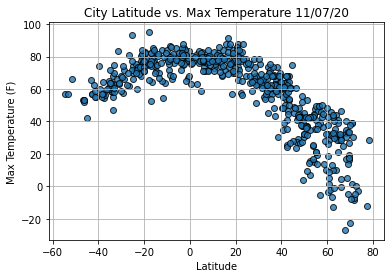

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

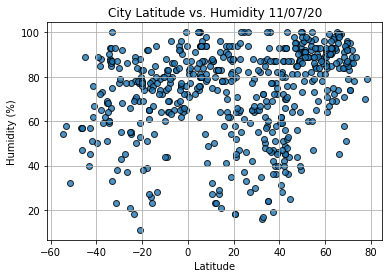

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

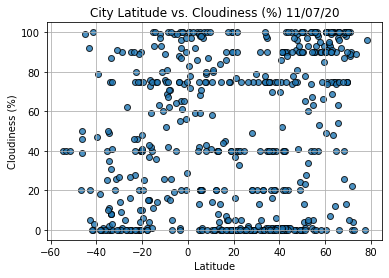

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


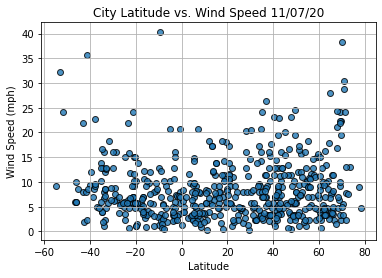

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [20]:
index13 = city_data_df.loc[13]
index13

City                      okhotsk
Coounty                        RU
Date          2020-11-07 22:32:48
Lat                         59.38
Lng                         143.3
Max Temp                    10.08
Humidity                       89
Cloudiness                     93
Wind Speed                  14.99
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
552     True
553    False
554    False
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Coounty,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,saint george,US,2020-11-07 22:30:45,37.10,-113.58,59.00,19,1,26.40
1,kontagora,NG,2020-11-07 22:30:15,10.40,5.47,73.11,32,14,3.60
3,saint-georges,GD,2020-11-07 22:33:20,12.06,-61.75,82.40,83,20,18.34
5,kurumkan,RU,2020-11-07 22:34:09,54.30,110.30,15.24,78,67,1.05
7,norman wells,CA,2020-11-07 22:33:34,65.28,-126.83,28.40,100,75,3.36
...,...,...,...,...,...,...,...,...,...
550,shingu,JP,2020-11-07 22:36:54,33.73,135.98,62.49,85,100,4.43
551,roald,NO,2020-11-07 22:33:58,62.58,6.13,44.01,93,90,3.36
552,arrifes,PT,2020-11-07 22:36:55,37.77,-25.70,59.00,72,20,5.82
555,skjervoy,NO,2020-11-07 22:36:55,70.03,20.97,37.71,79,100,38.32


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

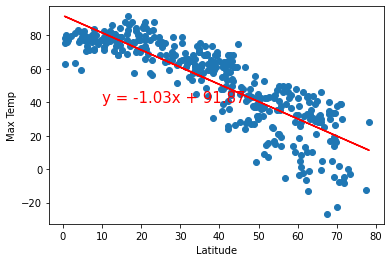

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

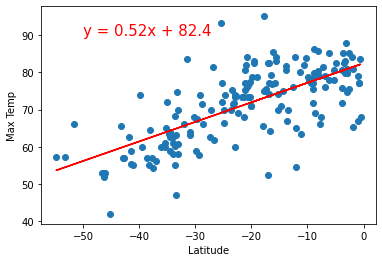

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

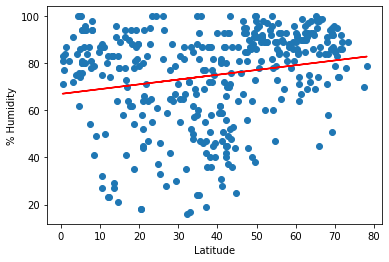

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

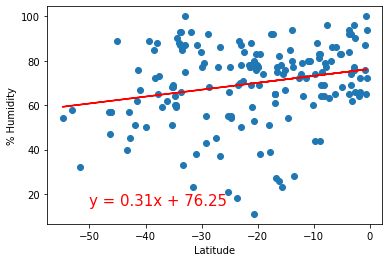

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

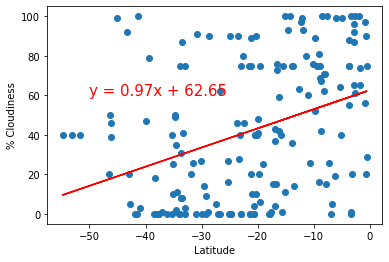

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

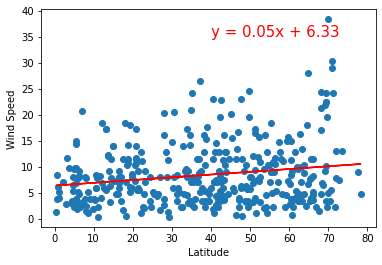

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

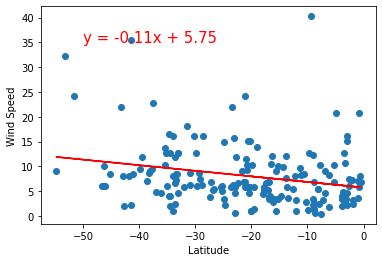

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))